In [4]:
import numpy as np
import pandas as pd

# Create a list of epsilon values from 0.5 to 3 with 0.5 increments
epsilon_values = np.arange(0.5, 3.5, 0.5)


In [5]:
# Create a list of algorithms
algorithms = ['Algo1', 'Algo2', 'Algo3', 'Algo4', 'Algo5']

# Number of test runs for each combination
num_test_runs = 10

# Create a DataFrame to hold all combinations
data = {
    'Algorithm': np.repeat(algorithms, len(epsilon_values) * num_test_runs),
    'Epsilon': np.tile(np.repeat(epsilon_values, num_test_runs), len(algorithms)),
    'Experiment': np.tile(np.arange(1, num_test_runs + 1), len(algorithms) * len(epsilon_values)),
    'SVM_Accuracy': np.random.rand(len(algorithms) * len(epsilon_values) * num_test_runs),  # Random data; replace with actual
    'TVD': np.random.rand(len(algorithms) * len(epsilon_values) * num_test_runs)  # Random data; replace with actual
}

df = pd.DataFrame(data)


In [6]:
summary_df = df.groupby(['Algorithm', 'Epsilon']).agg(
    mean_accuracy=('SVM_Accuracy', 'mean'),
    p5_accuracy=('SVM_Accuracy', lambda x: np.percentile(x, 5)),
    p95_accuracy=('SVM_Accuracy', lambda x: np.percentile(x, 95)),
    mean_tvd=('TVD', 'mean'),
    p5_tvd=('TVD', lambda x: np.percentile(x, 5)),
    p95_tvd=('TVD', lambda x: np.percentile(x, 95))
).reset_index()


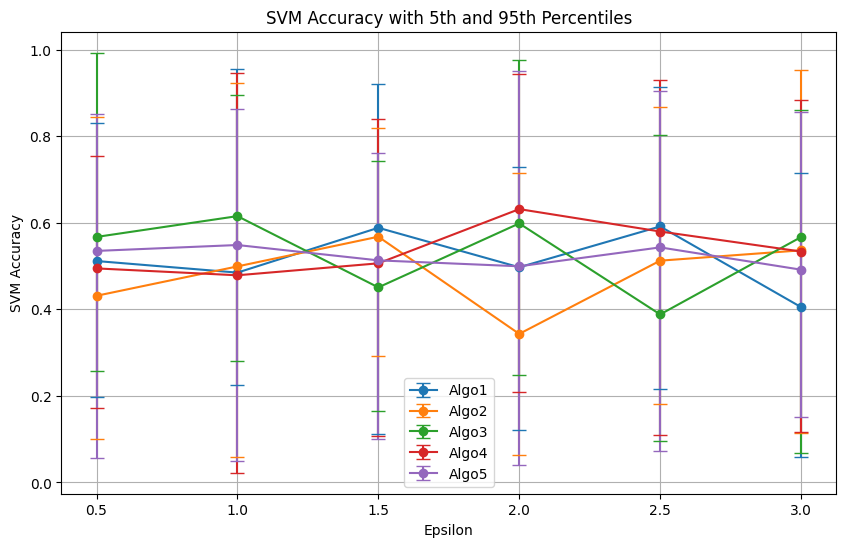

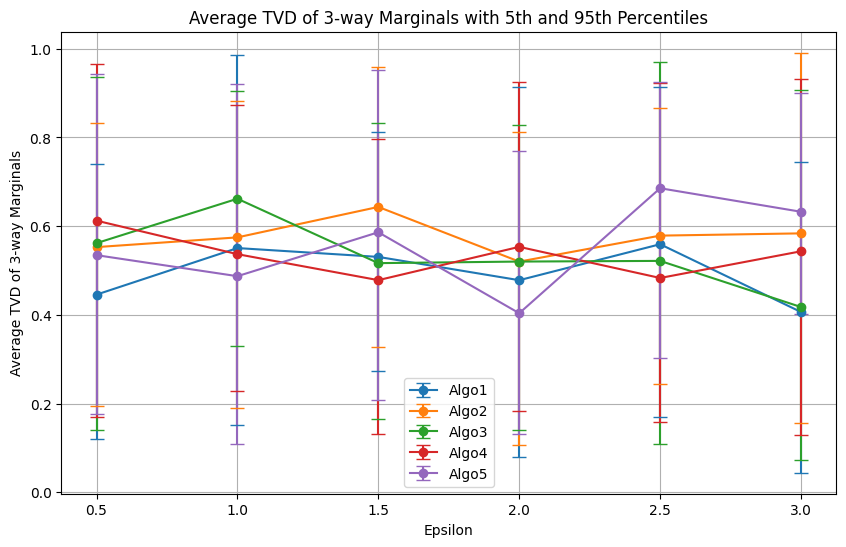

In [7]:
import matplotlib.pyplot as plt

# Plotting function
def plot_metric(metric, ylabel):
    plt.figure(figsize=(10, 6))
    for algorithm in summary_df['Algorithm'].unique():
        alg_data = summary_df[summary_df['Algorithm'] == algorithm]
        yerr = np.array([alg_data[f'mean_{metric}'] - alg_data[f'p5_{metric}'],
                         alg_data[f'p95_{metric}'] - alg_data[f'mean_{metric}']])
        plt.errorbar(np.array(alg_data['Epsilon']), np.array(alg_data[f'mean_{metric}']),
                     yerr=yerr, capsize=5, label=algorithm, marker='o')
    plt.xlabel('Epsilon')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} with 5th and 95th Percentiles')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot SVM Accuracy
plot_metric('accuracy', 'SVM Accuracy')

# Plot TVD
plot_metric('tvd', 'Average TVD of 3-way Marginals')


In [3]:
import numpy as np
import pandas as pd
import json

# Create a list of epsilon values from 0.5 to 3 with 0.5 increments
epsilon_values = np.arange(0.5, 3.5, 0.5)

# Create a list of algorithms
algorithms = ['PrivBayes', 'Greedy', 'Naive', 'PML-uniform', 'PML-empirical']

with open('adult-results-2-k2.json') as json_file:
    data = json.load(json_file)

df = pd.DataFrame(columns=["Algorithm", "Epsilon", "SVM_Accuracy", "TVD"])

for mode in range(1,6):
    y = []
    for ep in epsilon_values:
        l = data["acc"][ep][mode]

# Create a DataFrame to hold all combinations
data = {
    'Algorithm': np.repeat(algorithms, len(epsilon_values) * num_test_runs),
    'Epsilon': np.tile(np.repeat(epsilon_values, num_test_runs), len(algorithms)),
    'Experiment': np.tile(np.arange(1, num_test_runs + 1), len(algorithms) * len(epsilon_values)),
    'SVM_Accuracy': np.random.rand(len(algorithms) * len(epsilon_values) * num_test_runs),  # Random data; replace with actual
    'TVD': np.random.rand(len(algorithms) * len(epsilon_values) * num_test_runs)  # Random data; replace with actual
}

df = pd.DataFrame(data)
df.head()

,Algorithm,Epsilon,Experiment,SVM_Accuracy,TVD
0,PrivBayes,0.5,1,0.057071,0.124256
1,PrivBayes,0.5,2,0.583246,0.452209
2,PrivBayes,0.5,3,0.669000,0.313533
3,PrivBayes,0.5,4,0.903597,0.928914
4,PrivBayes,0.5,5,0.531099,0.331667


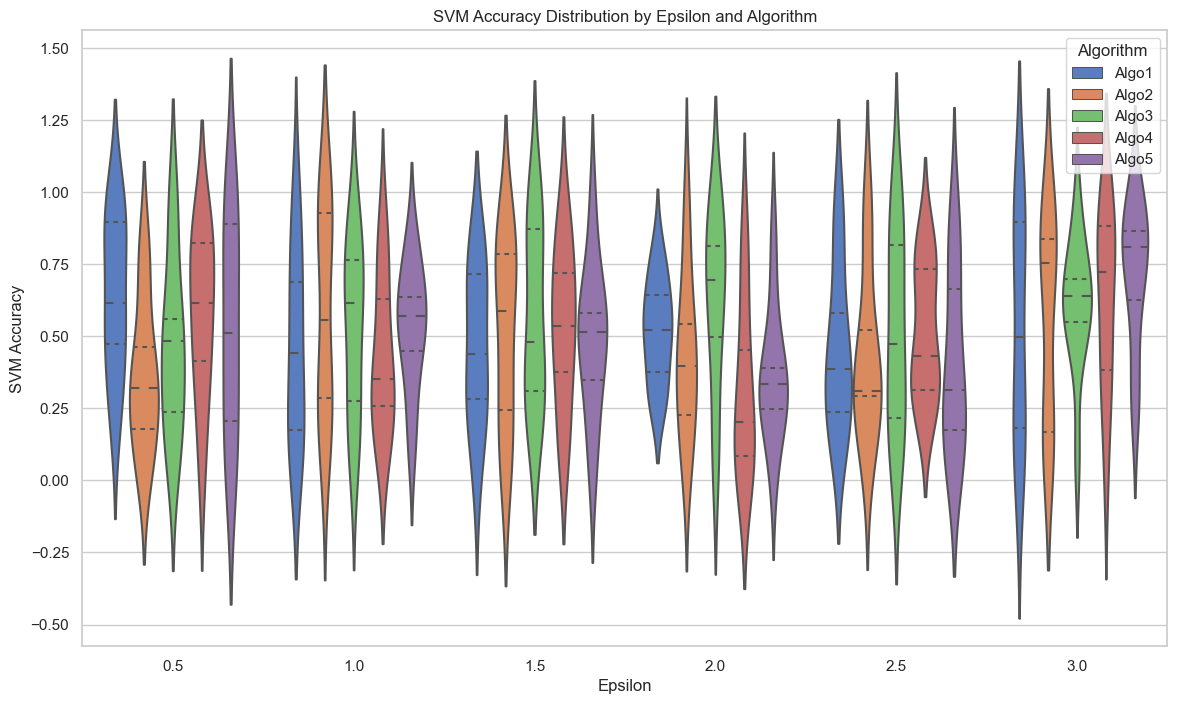

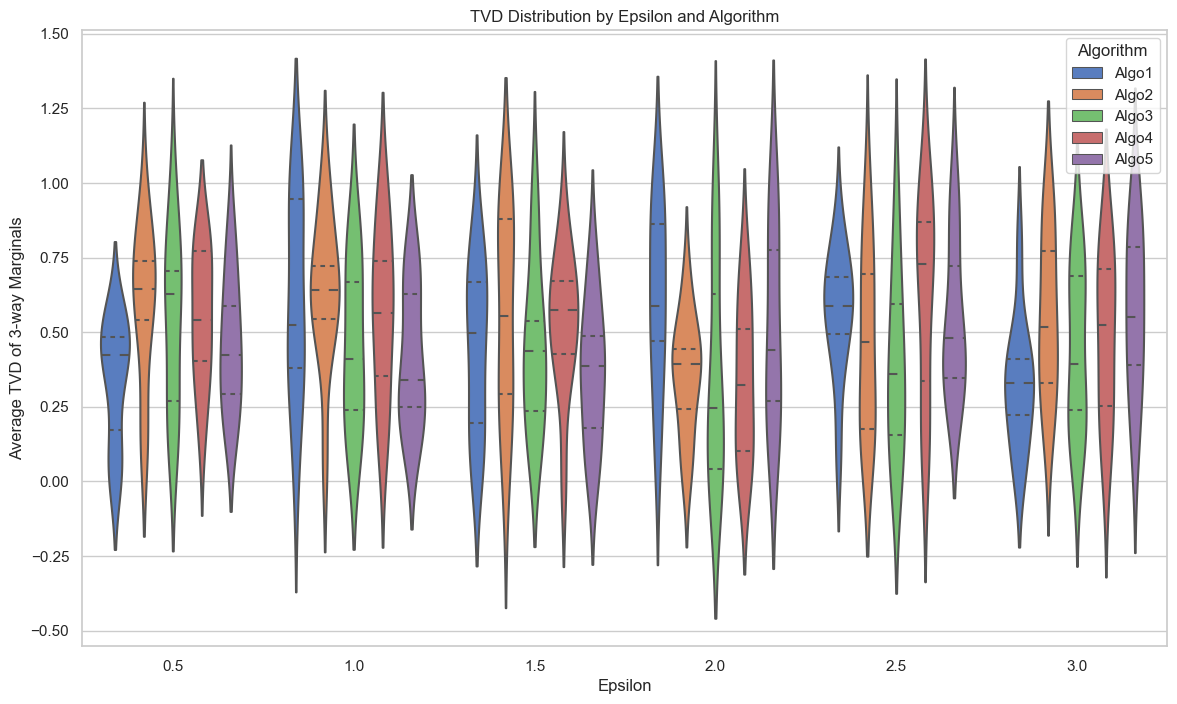

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot SVM Accuracy
plt.figure(figsize=(14, 8))
sns.violinplot(x='Epsilon', y='SVM_Accuracy', hue='Algorithm', data=df, inner='quart', palette='muted')
plt.title('SVM Accuracy Distribution by Epsilon and Algorithm')
plt.xlabel('Epsilon')
plt.ylabel('SVM Accuracy')
plt.legend(title='Algorithm')
plt.show()

# Plot TVD
plt.figure(figsize=(14, 8))
sns.violinplot(x='Epsilon', y='TVD', hue='Algorithm', data=df, inner='quart', palette='muted')
plt.title('TVD Distribution by Epsilon and Algorithm')
plt.xlabel('Epsilon')
plt.ylabel('Average TVD of 3-way Marginals')
plt.legend(title='Algorithm')
plt.show()

